In [75]:
import numpy as np
import pandas as pd

In [76]:
df = pd.read_csv('/content/winequality-red.csv')

In [77]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [78]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [79]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


In [80]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

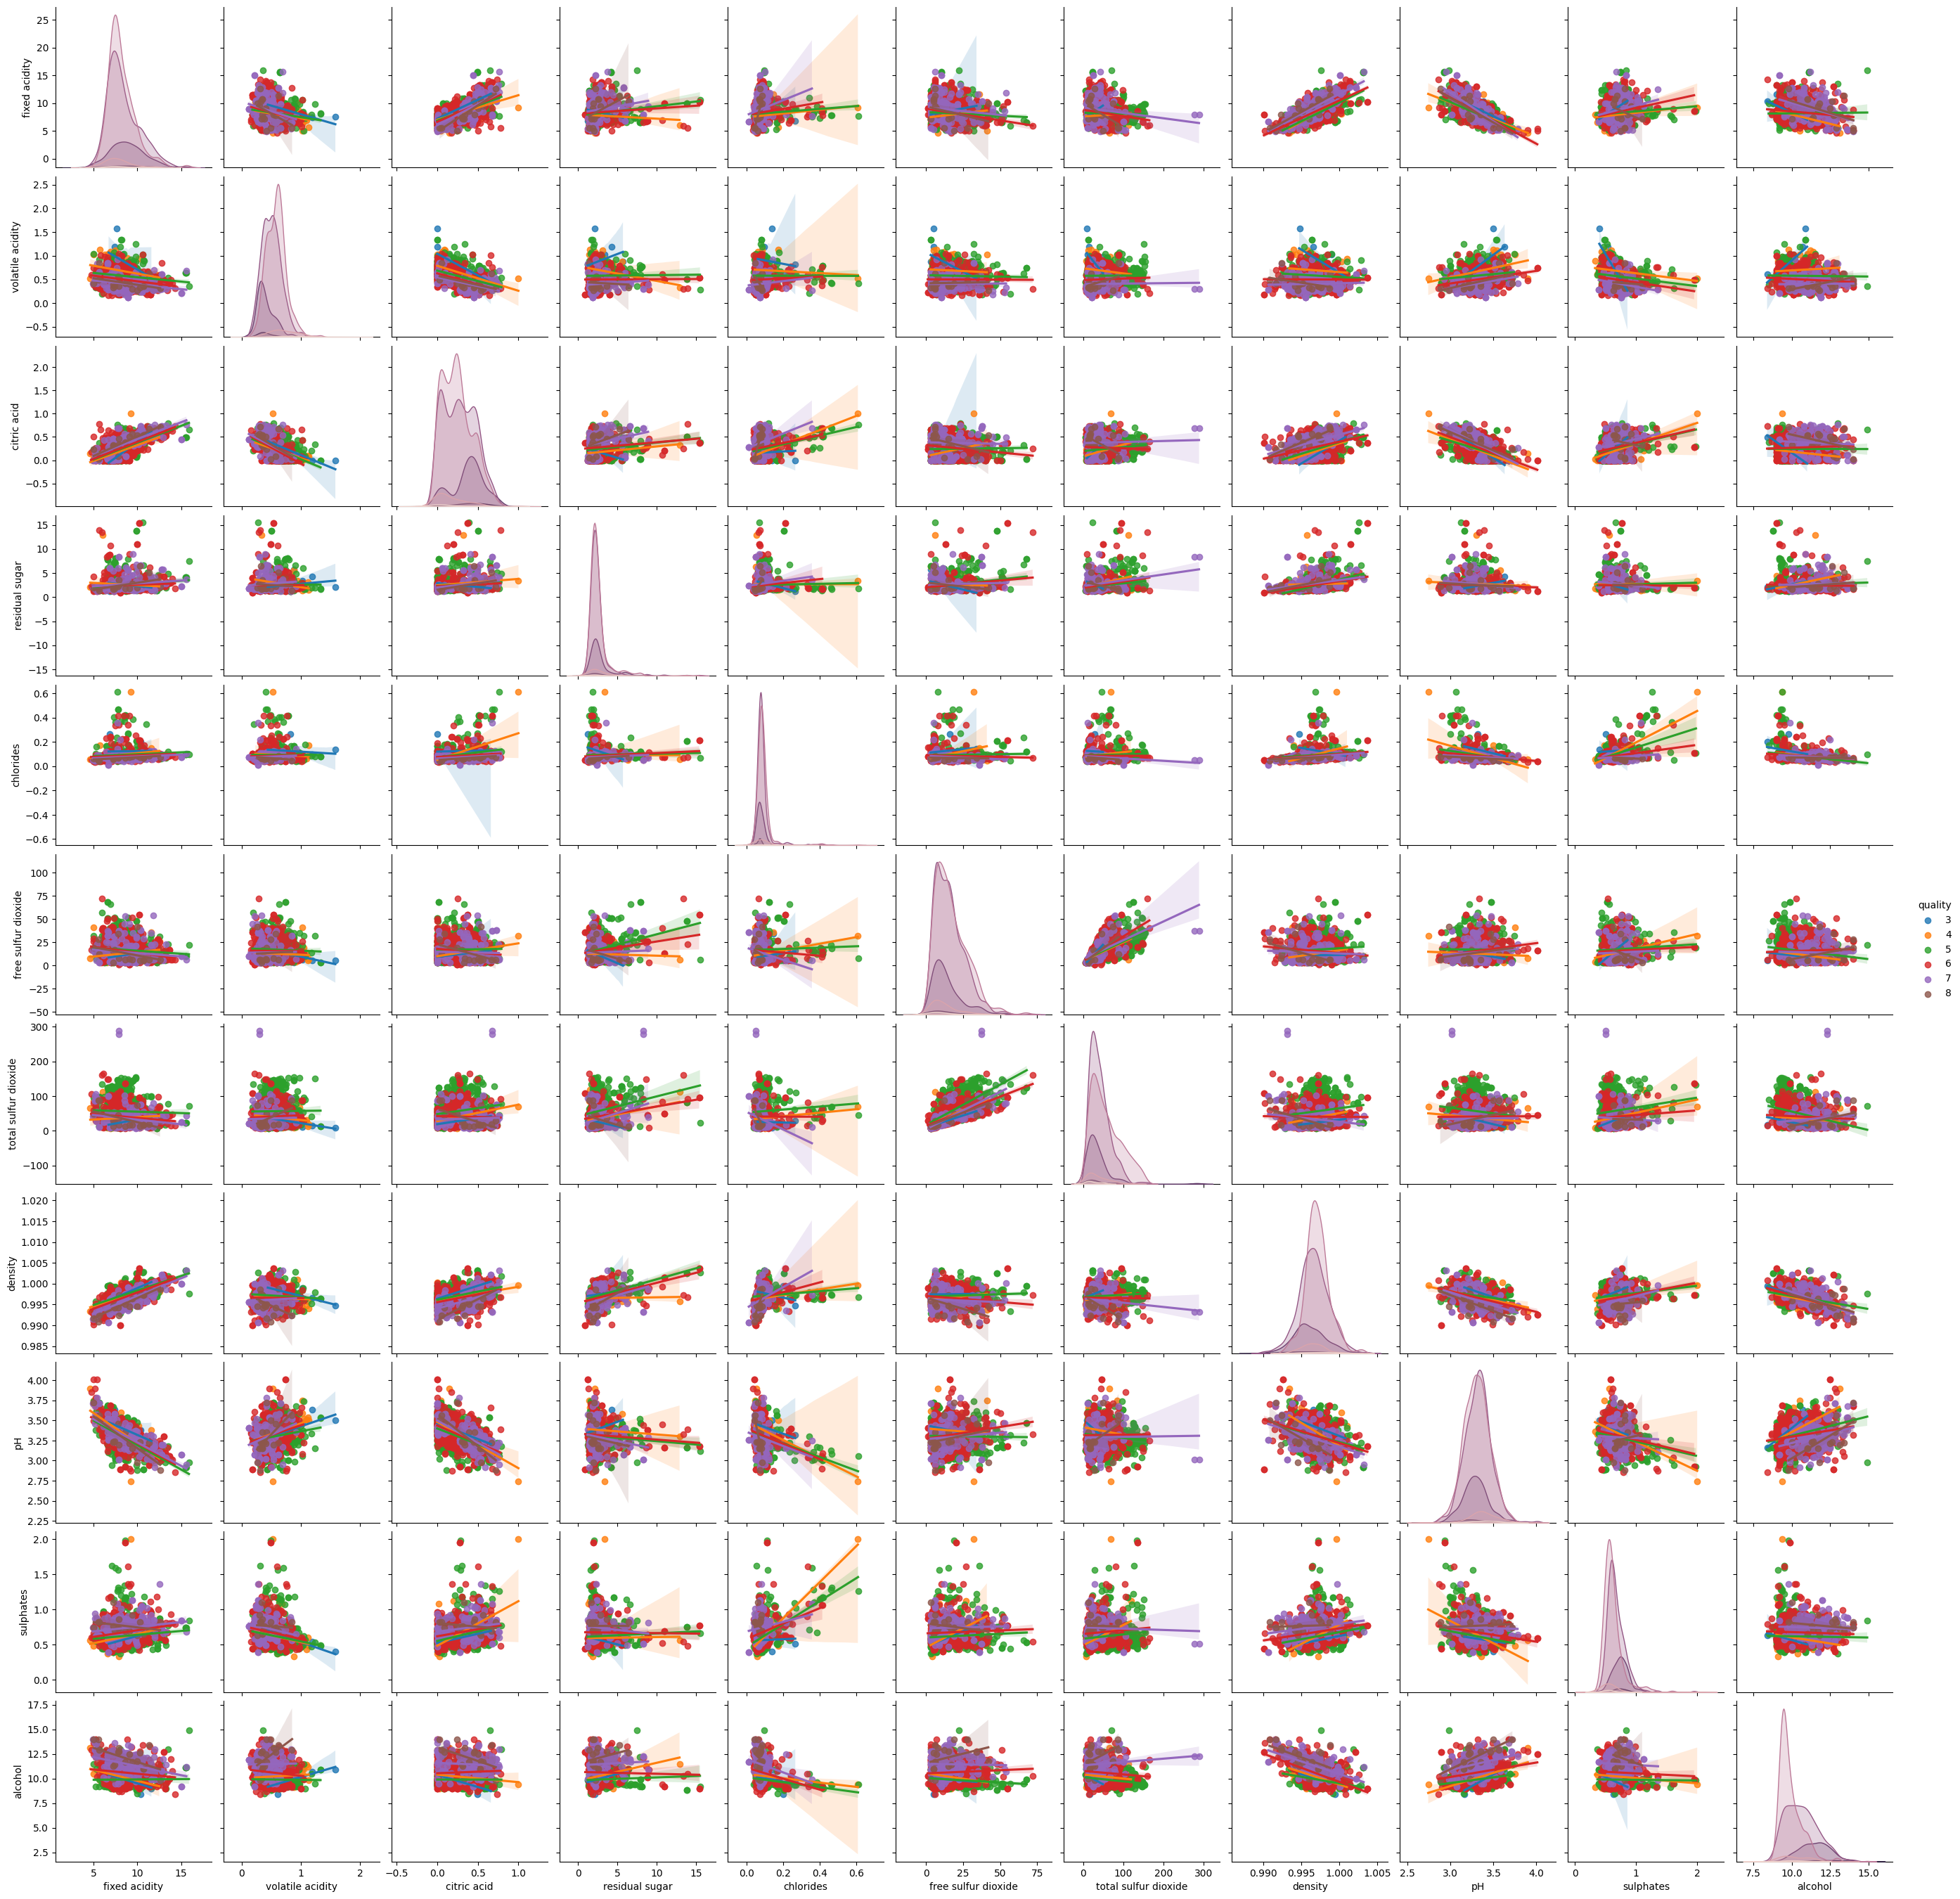

In [82]:
sns.pairplot(df,hue='quality',kind="reg")
plt.show()

In [83]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<ipython-input-84-4257448646>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='quality',data=df,kind='count',palette='rainbow')


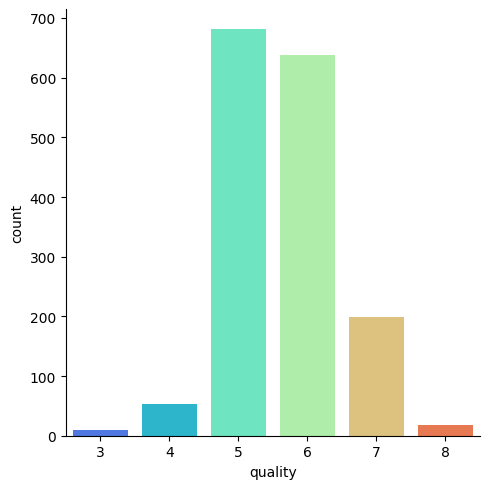

In [84]:
sns.catplot(x='quality',data=df,kind='count',palette='rainbow')
plt.show()

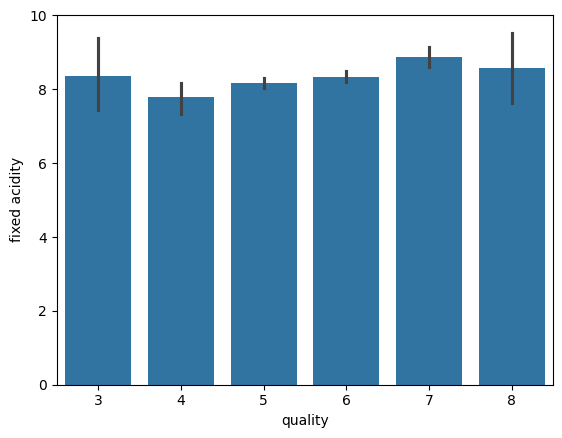

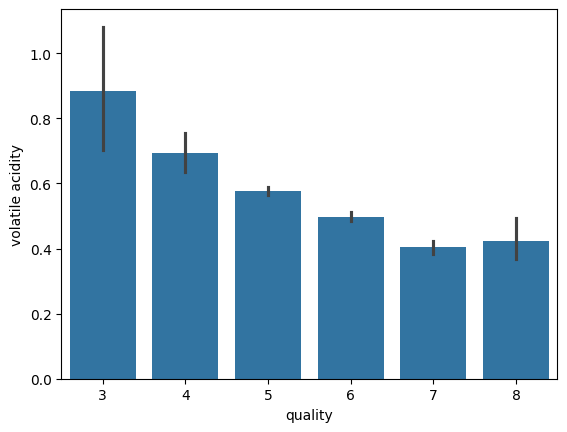

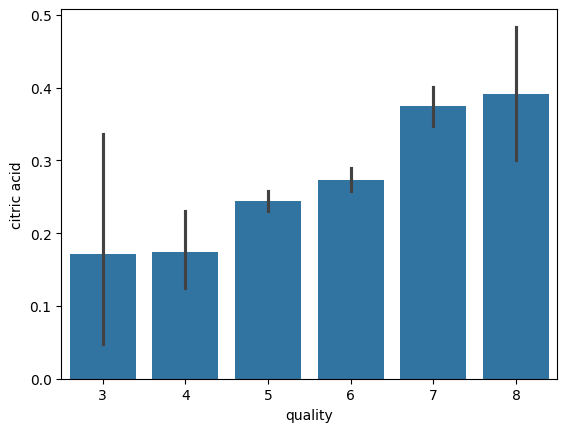

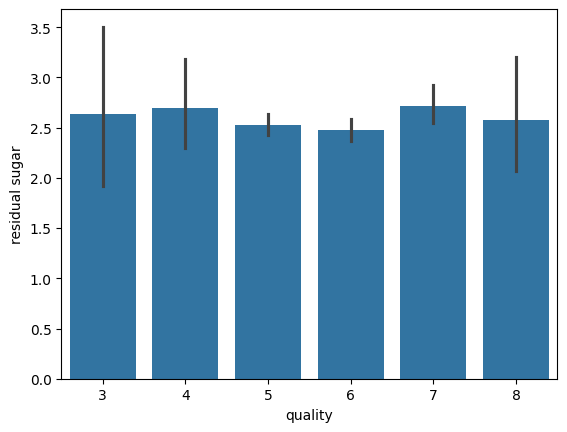

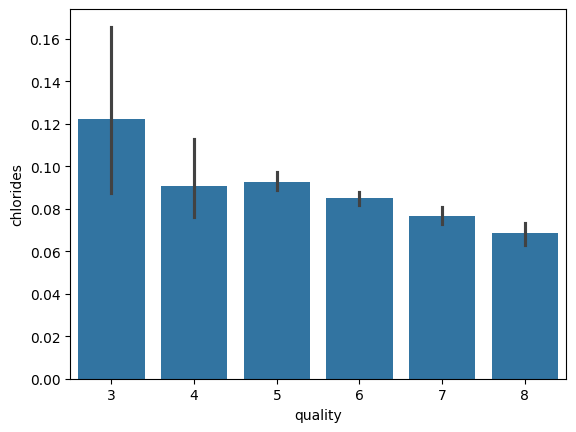

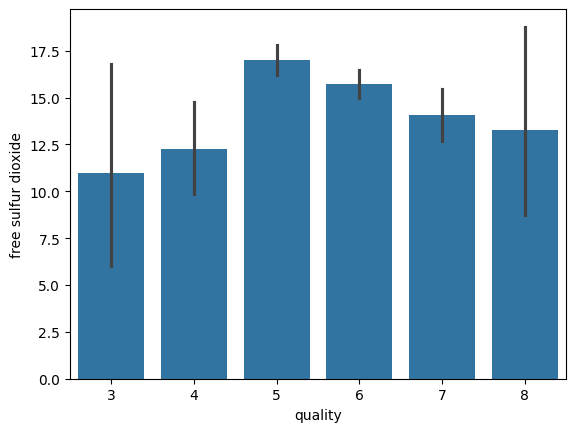

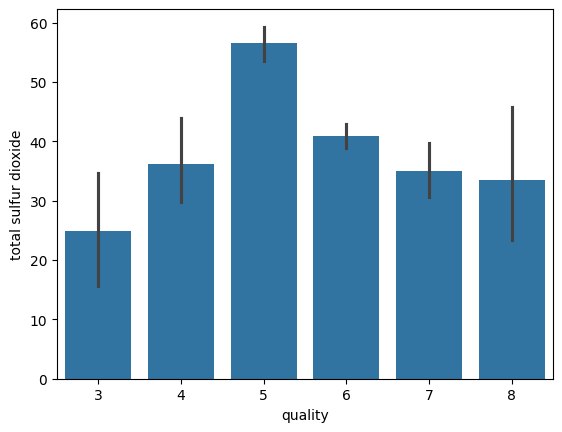

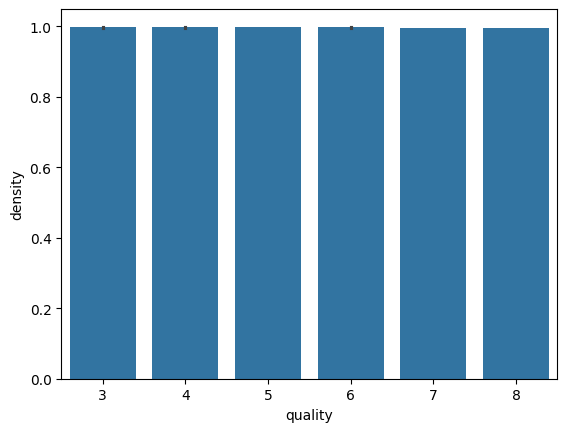

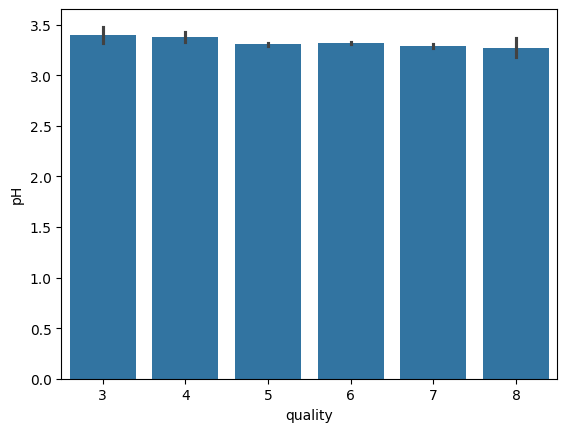

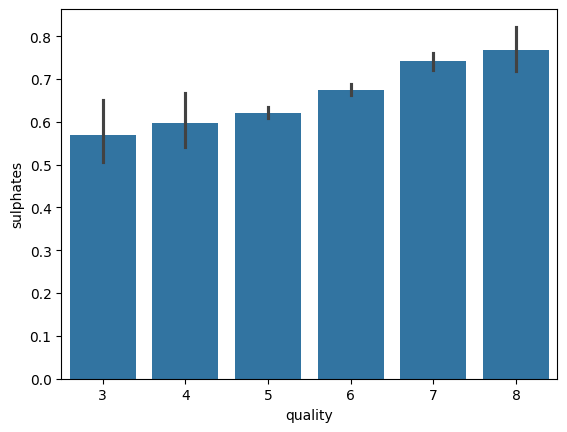

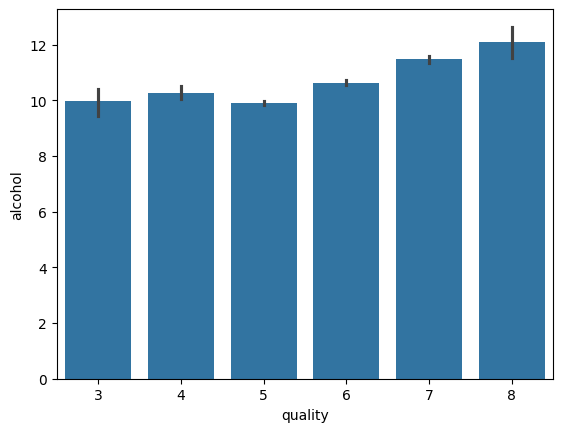

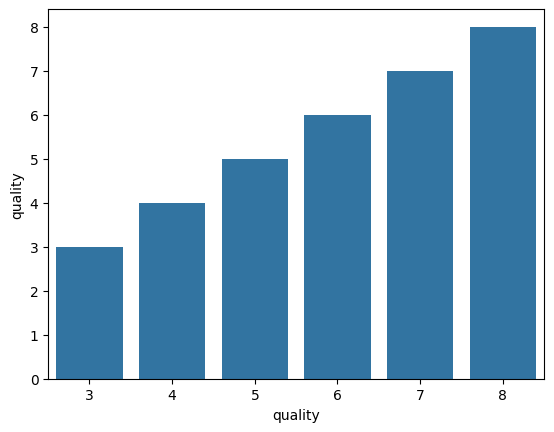

In [16]:
columns = df.columns
for col in columns:
  sns.barplot(x='quality',y=col,data = df)
  plt.show()
  print()

##Logistic Regression

In [42]:
dflogistic = df

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [44]:
scaler = StandardScaler()

In [45]:
X = dflogistic.drop('quality',axis=1)
y = dflogistic['quality']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
X_scaled = scaler.fit_transform(X_train)

In [48]:
X_scaled[0:5]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828]])

In [58]:
lr = LogisticRegression()
lr.fit(X_scaled,y_train)

LogisticRegression()

In [59]:
X_test = scaler.transform(X_test)
y_pred = lr.predict(X_test)
print("Accuracy of Logistic Regression: ",accuracy_score(y_test,y_pred))

Accuracy of Logistic Regression:  0.028125


In [56]:
X_val = np.linspace(X_scaled.min(),X_scaled.max(),300).reshape(-1,1)
y_prob = lr.predict_proba(X_val)[:,1]

ValueError: X has 1 features, but LogisticRegression is expecting 11 features as input.

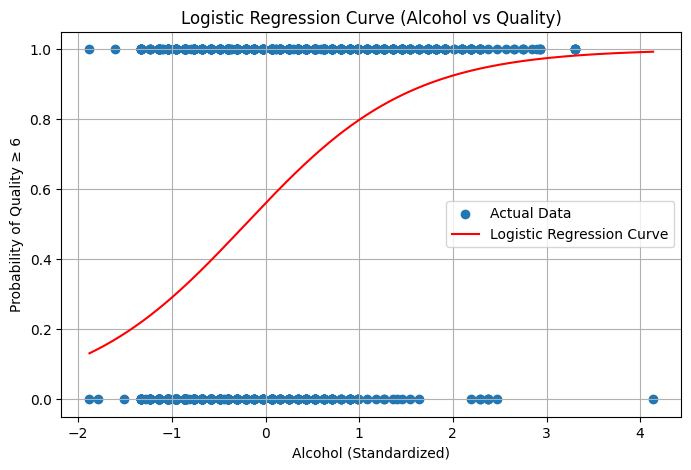

In [61]:
# Assuming you have a pandas DataFrame named `df`
X = df[['alcohol']]  # Only 1 feature
y = df['quality'] >= 6  # Convert to binary classification (e.g., good vs bad)

# Train-test split (optional)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

# Scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Train LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_scaled, y_train)

# Plot the curve
import numpy as np
import matplotlib.pyplot as plt

x_vals = np.linspace(X_scaled.min(), X_scaled.max(), 300).reshape(-1, 1)
y_probs = lr.predict_proba(x_vals)[:, 1]

plt.figure(figsize=(8, 5))
plt.scatter(X_scaled, y_train, label='Actual Data')
plt.plot(x_vals, y_probs, color='red', label='Logistic Regression Curve')
plt.xlabel('Alcohol (Standardized)')
plt.ylabel('Probability of Quality ≥ 6')
plt.title('Logistic Regression Curve (Alcohol vs Quality)')
plt.legend()
plt.grid(True)
plt.show()

In [63]:
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

##Voting Classifier

In [72]:
log_reg = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
bg = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10)

votingS = VotingClassifier(estimators=[('lr',log_reg),('svc',svc),('dt',dt),('rf',rf),('bg',bg)],voting='soft')
votingH = VotingClassifier(estimators=[('lr',log_reg),('svc',svc),('dt',dt),('rf',rf),('bg',bg)],voting='hard')

print("soft voting: ",cross_val_score(votingS,X_scaled,y_train,cv=5,scoring='accuracy').mean())
print("hard voting: ",cross_val_score(votingH,X_scaled,y_train,cv=5,scoring='accuracy').mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_available_if.py", line 32, in _check
    check_result = self.check(obj)
                   ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py", line 831, in _check_proba
    raise AttributeError(
AttributeError: predict_proba is not available when probability=False

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^

soft voting:  nan
hard voting:  0.6831066945606695


##Individual Model

In [74]:
models = [log_reg,svc,dt,rf,bg]
for model in models:
  model.fit(X_scaled,y_train)
  y_pred = model.predict(X_test)
  print(model)
  print("Accuracy: ",accuracy_score(y_test,y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


LogisticRegression()
Accuracy:  0.535
SVC()
Accuracy:  0.535
DecisionTreeClassifier()
Accuracy:  0.465
RandomForestClassifier()
Accuracy:  0.465
BaggingClassifier(estimator=DecisionTreeClassifier())
Accuracy:  0.465


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


##GridSearchCV

In [87]:
len(Y)

1599

In [86]:
from sklearn.model_selection import GridSearchCV

In [91]:
param = {
    'n_estimators' : [50,100,500],
    'max_samples' : [0.2,0.4,0.6,0.8,1.0],
    'max_features' : [0.2,0.4,0.6,0.8,1.0],
    'bootstrap' : [True,False]
}

In [92]:
search = GridSearchCV(RandomForestClassifier(),param,cv=5)

In [93]:
search.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueErr

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'max_samples': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'n_estimators': [50, 100, 500]})

In [95]:
search.best_params_

{'bootstrap': True,
 'max_features': 1.0,
 'max_samples': 0.2,
 'n_estimators': 50}

In [96]:
search.best_score_

np.float64(0.6956066945606695)

## RandomForestClassifier

In [97]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.6675


##Binary Classification

In [99]:
Y =np.where(df['quality'] > 6, 1, 0)

In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

#all models

In [101]:
log_reg = LogisticRegression()
svc = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=100)
bg = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=10)

models = {
    log_reg,
    svc,
    dt,
    rf,
    bg
}

for model in models:
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(model)
  print("Accuracy: ",accuracy_score(y_test,y_pred))

DecisionTreeClassifier()
Accuracy:  0.84375
LogisticRegression()
Accuracy:  0.834375
SVC()
Accuracy:  0.853125
RandomForestClassifier()
Accuracy:  0.84375
BaggingClassifier(estimator=DecisionTreeClassifier())
Accuracy:  0.828125


In [102]:
param = {
    'n_estimators' : [50,100,500],
    'max_samples' : [0.2,0.4,0.6,0.8,1.0],
    'max_features' : [0.2,0.4,0.6,0.8,1.0],
    'bootstrap' : [True,False]
}

search = GridSearchCV(RandomForestClassifier(),param,cv=5)
search.fit(X_train,y_train)
print(search.best_params_)
print(search.best_score_)

{'bootstrap': True, 'max_features': 0.4, 'max_samples': 0.2, 'n_estimators': 50}
0.8623927696078433


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
375 fits failed out of a total of 750.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 431, in fit
    raise ValueError(
ValueErr

In [105]:
final_model = RandomForestClassifier(bootstrap= True, max_features= 0.4, max_samples= 0.2, n_estimators= 50)
final_model.fit(X_train,y_train)
y_pred = final_model.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  0.840625
